In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_spotify00_19 = pd.read_csv("songs_normalize.csv")
df_spotify2023 = pd.read_csv("top_50_2023.csv")



In [2]:
def empty_cleaner(df): # cleanner function
    df_cleaned = df.dropna(axis=1, how='all') #removing all columns with all NaN values
    df_cleaned = df_cleaned.dropna(axis=1, how='all') #removing all columns with all NaN values
    return df_cleaned
    
df_spotify00_19_cleaned = empty_cleaner(df_spotify00_19) # apply the cleanning function
df_spotify2023_cleaned = empty_cleaner(df_spotify2023) # apply the cleanning function

In [3]:
df_spotify00_19_cleaned.head(1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3,0.000018,0.355,0.894,95.053,pop


In [4]:
df_spotify2023_cleaned.head(1)

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.00007,0.0232,0.0633,0,118.048,1,200600,4,94


In [5]:
df_spotify2023_cleaned['year'] = 2023 # creating column year = 2023 for all rows
df_spotify2023_cleaned.head(1)

,artist_name,track_name,is_explicit,album_release_date,genres,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity,year
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.00007,0.0232,0.0633,0,118.048,1,200600,4,94,2023


In [6]:
df_spotify2023_cleaned = df_spotify2023_cleaned.rename(columns={ # renaming columns
    'artist_name': 'artist',
    'track_name': 'song',
    'is_explicit': 'explicit',
    'genres': 'genre'
    })
df_spotify2023_cleaned.head(1)

,artist,song,explicit,album_release_date,genre,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity,year
0,Miley Cyrus,Flowers,False,2023-08-18,['pop'],0.706,0.632,0.691,-4.775,0.0584,0.00007,0.0232,0.0633,0,118.048,1,200600,4,94,2023


In [7]:
# removing columns that are not in 1st df
df_spotify2023_cleaned = df_spotify2023_cleaned[['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre']]

In [8]:
df_spotify2023_cleaned.head(1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Miley Cyrus,Flowers,200600,False,2023,94,0.706,0.691,0,-4.775,1,0.0633,0.0584,0.00007,0.0232,0.632,118.048,['pop']


In [9]:
df_spotify00_19_cleaned.head(1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3,0.000018,0.355,0.894,95.053,pop


In [29]:
df_spotify = pd.concat([df_spotify00_19_cleaned, df_spotify2023_cleaned], ignore_index=True) #concatenating both datasets

df_spotify['genre'] = df_spotify['genre'].str.replace(r"[\[\]']", "", regex=True)

df_spotify = df_spotify[df_spotify['popularity'] >= 50] # removing songs with lower popularity

df_spotify.head(1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3,0.000018,0.355,0.894,95.053,pop


In [32]:
# Count the total number of tracks in the dataset
total_tracks = df_spotify['song'].count()

total_tracks

1731

In [11]:
#lets create a dictionary to simplify the genres_id column
genre_simplification = {
    'pop': ['pop', 'rock, pop', 'pop, country', 'pop, R&B', 'pop, rock', 'pop, easy listening, Dance/Electronic', 'pop, Dance/Electronic', 'pop, latin', 'pop, Folk/Acoustic', 'pop, easy listening, jazz', 'pop, rock, metal', 'pop, rock, Dance/Electronic', 'pop, uk pop', 'pop, r&b, rap', 'bedroom pop', 'chill pop', 'piano rock, pop', 'dance pop, pop', 'modern alternative rock, modern rock, pop', 'canadian contemporary r&b, canadian pop, pop', 'argentine hip hop, pop venezolano, trap argentino, trap latino, urbano latino', 'colombian pop, pop reggaeton, reggaeton, reggaeton colombiano, trap latino, urbano latino', 'k-pop, k-pop girl group'],
    'rock': ['rock', 'rock, metal', 'rock, pop, metal', 'rock, Dance/Electronic', 'rock, blues', 'rock, classical', 'rock, easy listening', 'rock, blues, latin', 'rock, Folk/Acoustic, easy listening', 'garage rock, modern rock, permanent wave, rock, sheffield indie'],
    'hip hop': ['hip hop', 'hip hop, pop, R&B', 'hip hop, pop', 'hip hop, Dance/Electronic', 'hip hop, pop, rock', 'hip hop, latin, Dance/Electronic', 'detroit hip hop, hip hop, rap'],
    'R&B': ['R&B', 'hip hop, R&B'],
    'Dance/Electronic': ['Dance/Electronic'],
    'Folk/Acoustic': ['Folk/Acoustic, pop', 'World/Traditional, Folk/Acoustic'],
    'latin': ['latin', 'reggaeton, urbano latino'],
    'country': ['country', 'contemporary country'],
    'sad sierreño': ['corrido, corridos tumbados, sad sierreno, sierreno', 'corridos tumbados, sad sierreno'],
    'k-pop': ['k-pop'],
    'rap': ['rap'],
    'world/traditional': ['World/Traditional, pop'],
    'edm': ['big room, dance pop, edm, pop, pop dance'],
    'modern pop': ['modern indie pop, pov: indie, singer-songwriter pop'],
    # Add more generalized categories as needed
}

# Function to simplify genre
def simplify_genre(genre):
    for simple_genre, complex_genres in genre_simplification.items():
        if genre in complex_genres:
            return simple_genre
    return 'other'  # default category if not matched

# Apply the function to simplify genres
df_spotify['simplified_genre'] = df_spotify['genre'].apply(simplify_genre)

df_spotify.head(1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,simplified_genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,pop


In [12]:
df_spotify_songs = df_spotify[["song","artist", "simplified_genre", "duration_ms", "explicit", "year", "popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]
df_spotify_songs.rename(columns={"song": "song_id", "artist": "artist_id", "simplified_genre": "genre_id"}, inplace=True) # better names on columns :)
df_spotify_songs

/var/folders/t4/jslpkm0j619f3503694dsvd80000gp/T/ipykernel_34792/3151756612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify_songs.rename(columns={"song": "song_id", "artist": "artist_id", "simplified_genre": "genre_id"}, inplace=True) # better names on columns :)


,song_id,artist_id,genre_id,duration_ms,explicit,year,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Oops!...I Did It Again,Britney Spears,pop,211160,False,2000,77,0.751,0.834,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,All The Small Things,blink-182,pop,167066,False,1999,79,0.434,0.897,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,Breathe,Faith Hill,pop,250546,False,1999,66,0.529,0.496,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,It's My Life,Bon Jovi,rock,224493,False,2000,78,0.551,0.913,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,Bye Bye Bye,*NSYNC,pop,200560,False,2000,65,0.614,0.928,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,See You Again (feat. Kali Uchis),"Tyler, The Creator",other,180387,True,2023,92,0.558,0.559,-9.222,0.0959,0.3710,0.000007,0.1090,0.620,78.558
2046,Me Porto Bonito,Bad Bunny,other,178567,True,2023,89,0.911,0.712,-5.105,0.0817,0.0901,0.000027,0.0933,0.425,92.005
2047,OMG,NewJeans,pop,212253,False,2023,87,0.804,0.771,-4.067,0.0433,0.3570,0.000003,0.1080,0.739,126.956
2048,AMG,Natanael Cano,other,174943,True,2023,81,0.772,0.730,-6.657,0.0972,0.1520,0.000107,0.2740,0.786,136.175


In [13]:
#let's create genre table:
df_spotify_genres = df_spotify_songs.groupby('genre_id', as_index=False).agg({
    'song_id': 'count',  # Count of songs per genre
    'artist_id': pd.Series.nunique,  # Unique artist count per genre
    'explicit': 'sum',  # Count explicit songs per genre
    'popularity': ['max', 'min', 'mean'],  # Max, min, and average popularity
    'duration_ms': 'mean',  # Average duration
    'danceability': 'mean',  # Average danceability
    'energy': 'mean',  # Average energy
    'loudness': 'mean',  # Average loudness
    'speechiness': 'mean',  # Average speechiness
    'acousticness': 'mean',  # Average acousticness
    'instrumentalness': 'mean',  # Average instrumentalness
    'liveness': 'mean',  # Average liveness
    'valence': 'mean',  # Average valence
    'tempo': 'mean',  # Average tempo
})

# Flatten the column hierarchy generated by the .agg() method
df_spotify_genres.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_spotify_genres.columns.values]

# Rename columns for clarity
df_spotify_genres = df_spotify_genres.rename(columns={
    'song_id_count': 'song_count',
    'artist_id_nunique': 'artist_count',
    'explicit_sum': 'explicit_count',
    'popularity_max': 'max_popularity',
    'popularity_min': 'min_popularity',
    'popularity_mean': 'average_popularity',
})

df_spotify_genres

,genre_id_,song_count,artist_count,explicit_count,max_popularity,min_popularity,average_popularity,duration_ms_mean,danceability_mean,energy_mean,loudness_mean,speechiness_mean,acousticness_mean,instrumentalness_mean,liveness_mean,valence_mean,tempo_mean
0,Dance/Electronic,28,28,3,84,50,60.821429,244159.357143,0.666536,0.781250,-6.156429,0.060739,0.067285,8.147022e-02,0.184800,0.560786,126.499929
1,Folk/Acoustic,3,3,0,81,69,75.000000,232575.666667,0.514667,0.579333,-7.636333,0.038133,0.599333,2.203333e-01,0.129667,0.306000,102.226333
2,R&B,14,11,2,78,52,66.428571,229865.785714,0.653857,0.687143,-6.289929,0.118436,0.120957,8.345479e-04,0.143636,0.583714,111.992714
3,country,10,7,1,84,50,61.400000,212036.000000,0.572900,0.707100,-5.149600,0.033430,0.268757,3.850000e-07,0.168260,0.559900,147.480000
4,edm,1,1,1,92,92,92.000000,175238.000000,0.561000,0.965000,-3.673000,0.034300,0.003830,7.070000e-06,0.371000,0.304000,128.040000
5,hip hop,591,227,365,91,50,67.923858,237593.269036,0.723885,0.686267,-5.683863,0.160248,0.120651,4.558285e-03,0.182640,0.559524,118.178988
6,k-pop,2,2,1,93,90,91.500000,197896.000000,0.709500,0.782000,-4.815000,0.042950,0.157250,0.000000e+00,0.218350,0.617000,122.494000
7,latin,13,9,3,81,51,71.153846,229875.000000,0.734077,0.735462,-4.421769,0.135069,0.247177,8.137662e-04,0.163462,0.556538,122.927769
8,modern pop,1,1,0,83,83,83.000000,209260.000000,0.515000,0.593000,-4.801000,0.032200,0.653000,1.620000e-01,0.250000,0.153000,94.467000
9,other,153,82,29,94,50,70.111111,219646.228758,0.673810,0.763412,-4.987124,0.092637,0.153396,2.639670e-02,0.186782,0.585090,119.053915


In [14]:
# let's create the artists table
grouped = df_spotify_songs.groupby('artist_id', as_index=False).agg({
    'song_id': 'count',  # Count of songs
    'genre_id': lambda x: x.mode()[0],  # Most common genre
    'popularity': ['max', 'min', 'mean'],  # Max, Min, Mean popularity
    'year': 'min'  # Minimum year
})

# Renaming the columns to more understandable names
grouped.columns = ['artist_id', 'song_count', 'most_common_genre', 'max_popularity', 'min_popularity', 'average_popularity', 'first_time_topsong']

# Create the new dataframe
df_spotify_artists = grouped

# Check the result
df_spotify_artists

,artist_id,song_count,most_common_genre,max_popularity,min_popularity,average_popularity,first_time_topsong
0,*NSYNC,3,pop,65,50,58.333333,2000
1,112,2,hip hop,63,57,60.000000,2001
2,2 Chainz,2,hip hop,71,69,70.000000,2013
3,21 Savage,2,hip hop,78,74,76.000000,2017
4,2Pac,2,hip hop,68,57,62.500000,2001
...,...,...,...,...,...,...,...
749,fun.,1,pop,76,76,76.000000,2012
750,girl in red,1,pop,82,82,82.000000,2018
751,iann dior,2,hip hop,72,69,70.500000,2019
752,iio,1,Dance/Electronic,54,54,54.000000,2006


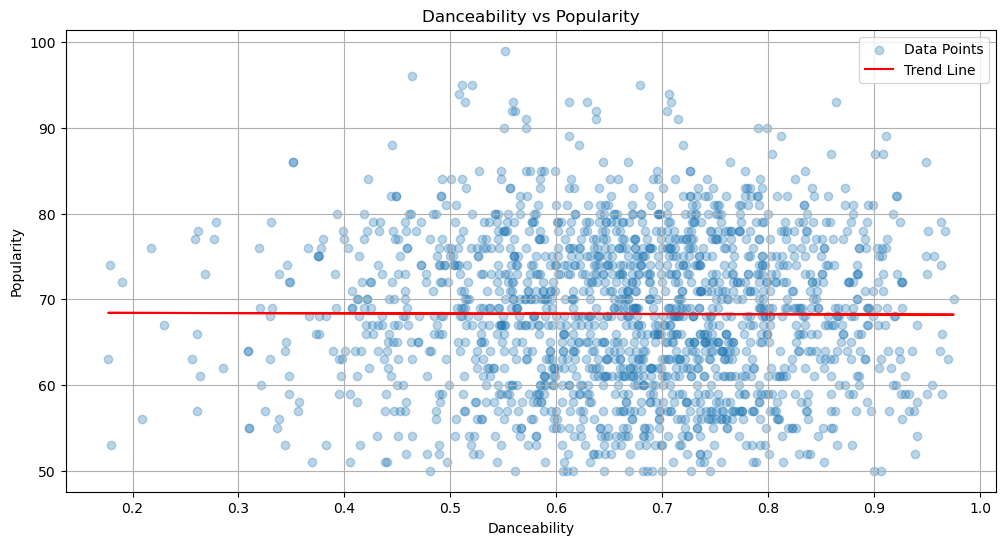

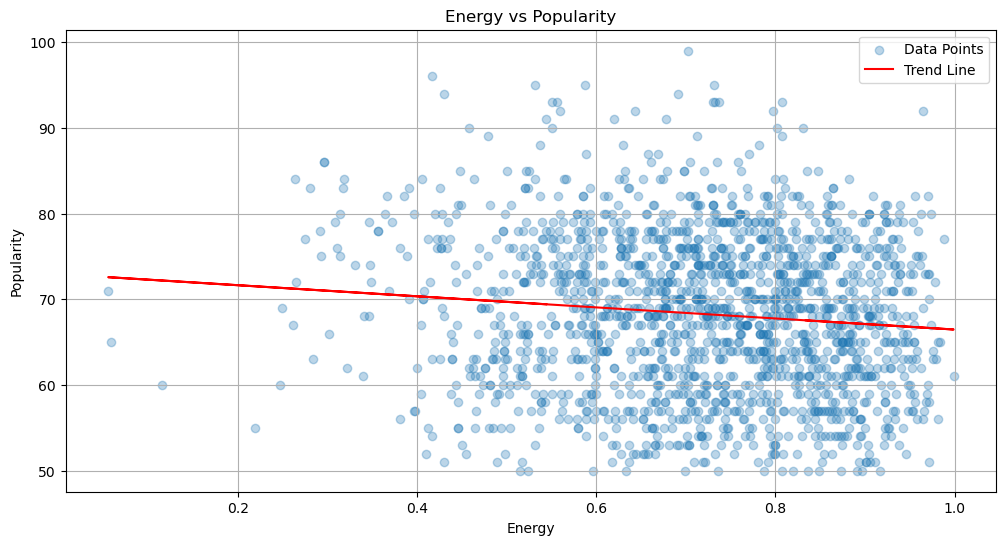

In [20]:
# Visualisations
# Hypothesis 1

import numpy as np
import matplotlib.pyplot as plt

# Scatter plot for Danceability vs Popularity
plt.figure(figsize=(12, 6))
plt.scatter(df_spotify_songs['danceability'], df_spotify_songs['popularity'], alpha=0.3, label="Data Points")

# Trend line
m, b = np.polyfit(df_spotify_songs['danceability'], df_spotify_songs['popularity'], 1)
plt.plot(df_spotify_songs['danceability'], m * df_spotify_songs['danceability'] + b, color='red', label="Trend Line")

plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Energy vs Popularity
plt.figure(figsize=(12, 6))
plt.scatter(df_spotify_songs['energy'], df_spotify_songs['popularity'], alpha=0.3, label="Data Points")

# Trend line
m, b = np.polyfit(df_spotify_songs['energy'], df_spotify_songs['popularity'], 1)
plt.plot(df_spotify_songs['energy'], m * df_spotify_songs['energy'] + b, color='red', label="Trend Line")

plt.title('Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()


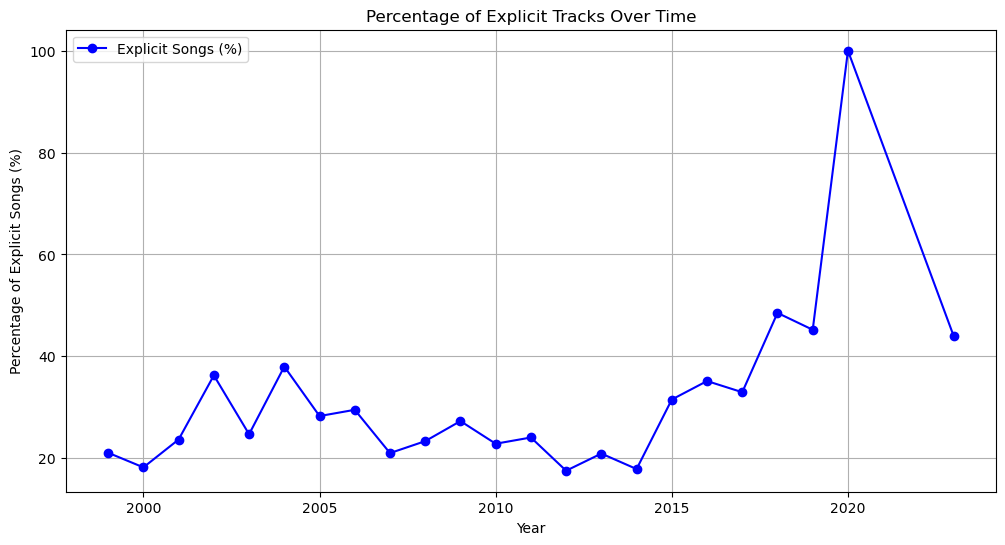

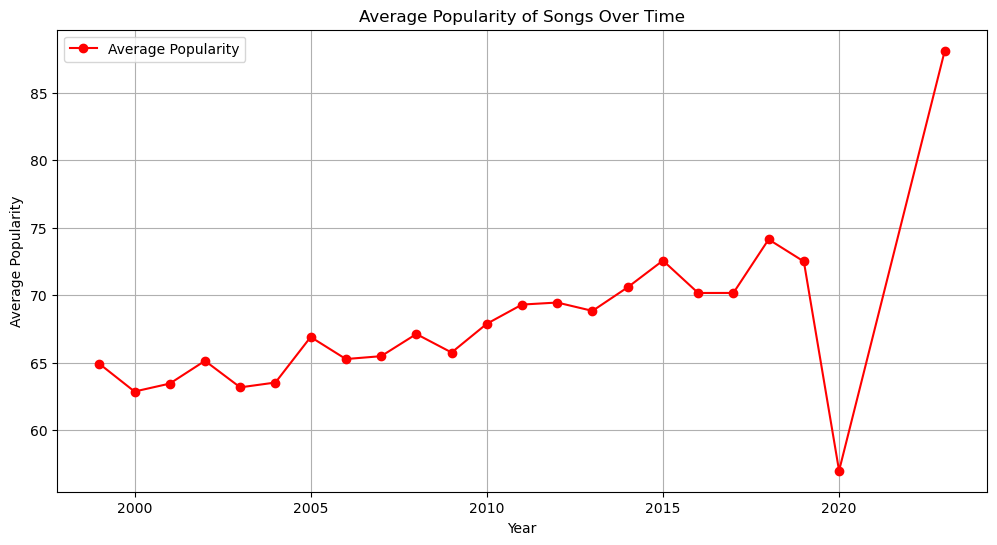

In [23]:
# Visualisations
# Hypothesis 2

# Aggregating Data
explicit_trend = df_spotify_songs.groupby('year').agg(
    explicit_count=('explicit', 'sum'),
    total_tracks=('song_id', 'count'),
    average_popularity=('popularity', 'mean')
).reset_index()

# Percentage of Explicit Songs Over Time
explicit_trend['explicit_percentage'] = (explicit_trend['explicit_count'] / explicit_trend['total_tracks']) * 100

# Line plot for Explicit Song Trend
plt.figure(figsize=(12, 6))
plt.plot(explicit_trend['year'], explicit_trend['explicit_percentage'], marker='o', linestyle='-', label='Explicit Songs (%)', color='blue')
plt.title('Percentage of Explicit Tracks Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Explicit Songs (%)')
plt.grid(True)
plt.legend()
plt.show()

# Line Plot for Popularity of Explicit Songs Over Time
plt.figure(figsize=(12, 6))
plt.plot(explicit_trend['year'], explicit_trend['average_popularity'], marker='o', linestyle='-', label='Average Popularity', color='red')
plt.title('Average Popularity of Songs Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.legend()
plt.show()


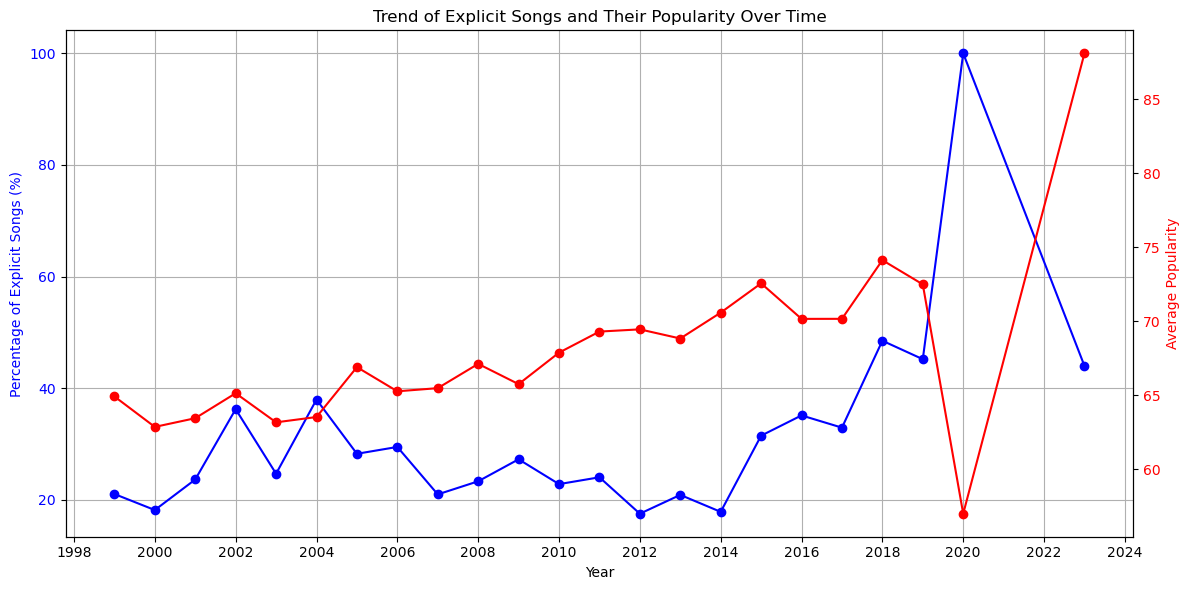

In [25]:
# Visualisations
# Hypothesis 2

import matplotlib.ticker as ticker

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Explicit Songs Percentage
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Explicit Songs (%)', color='blue')
ax1.plot(explicit_trend['year'], explicit_trend['explicit_percentage'], marker='o', linestyle='-', color='blue', label='Explicit Songs (%)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Set x-axis ticks to 2-year increments
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))

# Create second y-axis for Popularity
ax2 = ax1.twinx()
ax2.set_ylabel('Average Popularity', color='red')
ax2.plot(explicit_trend['year'], explicit_trend['average_popularity'], marker='o', linestyle='-', color='red', label='Average Popularity')
ax2.tick_params(axis='y', labelcolor='red')

# Title and Layout
plt.title('Trend of Explicit Songs and Their Popularity Over Time')
fig.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Grouping data by year to get explicit count and total tracks
explicit_trend = df_spotify_songs.groupby('year').agg(
    explicit_count=('explicit', 'sum'),  # Total explicit songs per year
    total_tracks=('song_id', 'count')  # Total tracks per year
).reset_index()

# Display the results
print(explicit_trend)


    year  explicit_count  total_tracks
0   1999               8            38
1   2000              12            66
2   2001              22            93
3   2002              29            80
4   2003              20            81
5   2004              30            79
6   2005              26            92
7   2006              23            78
8   2007              17            81
9   2008              21            90
10  2009              21            77
11  2010              21            92
12  2011              19            79
13  2012              17            97
14  2013              14            67
15  2014              15            84
16  2015              23            73
17  2016              26            74
18  2017              28            85
19  2018              49           101
20  2019              33            73
21  2020               1             1
22  2023              22            50


1731

In [15]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [16]:
import mysql.connector
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root1234",
    database="spotify",
    charset='utf8mb4'
)

# CREATING .CSV FILES FROM DATAFRAMES /!\

In [17]:
df_spotify_songs.to_csv("songs.csv", index=False, sep=";", encoding="utf-8")
df_spotify_genres.to_csv("genres.csv", index=False, sep=";", encoding="utf-8")
df_spotify_artists.to_csv("artists.csv", index=False, sep=";",encoding="utf-8")

In [18]:
df_spotify_artists['artist_id'].unique()

array(['*NSYNC', '112', '2 Chainz', '21 Savage', '2Pac', '3 Doors Down',
       '3LW', '3OH!3', '5 Seconds of Summer', '50 Cent', '6ix9ine',
       '99 Souls', 'A Boogie Wit da Hoodie', 'A$AP Ferg', 'A$AP Rocky',
       'A.R. Rahman', 'A1', 'AJ Tracey', 'Aaliyah', 'Adam Lambert',
       'Adele', 'Afroman', 'Agnes', 'Akon', 'Alan Walker',
       'Alanis Morissette', 'Alec Benjamin', 'Alesha Dixon',
       'Alessia Cara', 'Alesso', 'Alex & Sierra', 'Alex Clare',
       'Alex Gaudino', 'Alexandra Burke', 'Alice Deejay', 'Alicia Keys',
       'Alien Ant Farm', 'All Saints', 'All Time Low', 'Alok', 'Amerie',
       'Amy Winehouse', 'Anastacia', 'Anne-Marie', 'Anuel AA',
       'Arctic Monkeys', 'Ariana Grande', 'Armin van Buuren', 'Ashanti',
       'Asher Roth', 'Ashlee Simpson', 'Ashley O', 'Atomic Kitten',
       'Audioslave', 'Avant', 'Avicii', 'Avril Lavigne', 'Ayo & Teo',
       'B Young', 'B.o.B', 'B2K', 'Baauer', 'Baby Bash',
       'Baby Boy Da Prince', 'Backstreet Boys', 'Bad Bunny

In [35]:
import csv

# Read the CSV file
with open('songs.csv', 'r', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    rows = list(reader)

# Write the cleaned CSV file
with open('songs_cleaned.csv', 'w', encoding='utf-8', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(rows)

print("CSV file has been cleaned and saved as 'songs_cleaned.csv'")

CSV file has been cleaned and saved as 'songs_cleaned.csv'
